In [1]:
!pip install --quiet umap-learn

In [2]:
import pandas as pd

DATA = '/kaggle/input/mountains-vs-beaches-preference/mountains_vs_beaches_preferences.csv'
df = pd.read_csv(filepath_or_buffer=DATA)

df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


<Axes: ylabel='Frequency'>

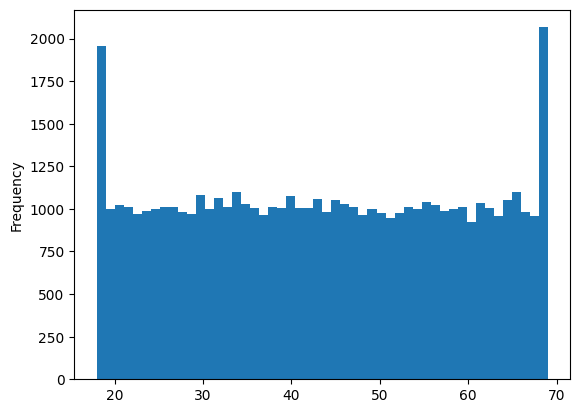

In [3]:
df['Age'].plot(kind='hist', bins=50)

That's a weird distribution. Have you ever seen a real dataset with ages distributed like that?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [5]:
df['Gender'].value_counts()

Gender
female        17638
male          17522
non-binary    17284
Name: count, dtype: int64

Um no. Just no.

<Axes: ylabel='Frequency'>

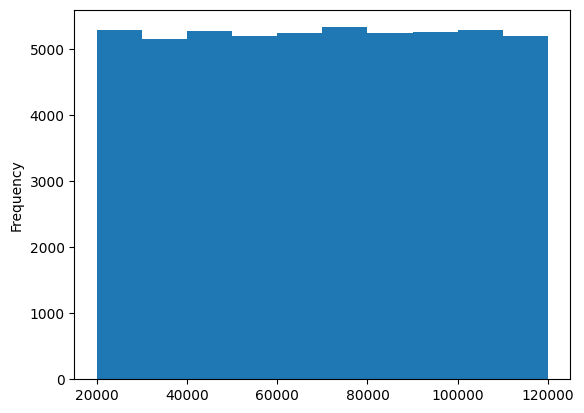

In [6]:
df['Income'].plot(kind='hist')

That's weird. Have you ever seen uniformly distributed income in a real dataset? Let's see if it has any evidence of being sensitive to age.

<Axes: xlabel='Age', ylabel='Income'>

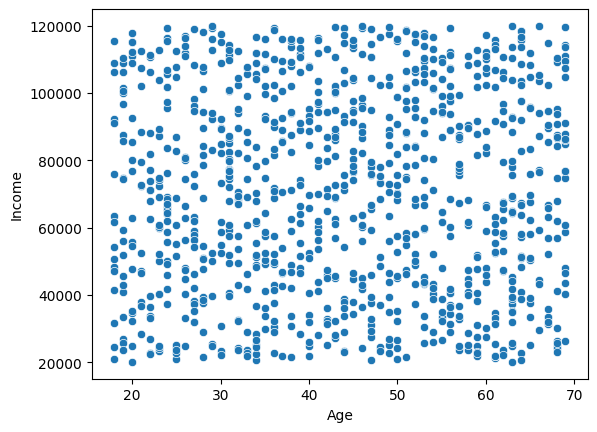

In [7]:
from seaborn import scatterplot

scatterplot(data=df.sample(n=1000, random_state=2024), x='Age', y='Income')

Nope. It's uniform distributions all the way down. Let's make a scatter plot of the numerical data and the target variable and be done.

In [8]:
import arrow
from umap import UMAP


time_start = arrow.now()
COLUMNS = [item for item, type in df.dtypes.to_dict().items() if str(type) == 'int64' and item != 'Preference']

reducer = UMAP(random_state=2024, verbose=False, n_jobs=1, low_memory=False, n_epochs=201)
df[['x', 'y']] = reducer.fit_transform(X=df[COLUMNS].fillna(value=0.0))
print('done with UMAP in {}'.format(arrow.now() - time_start))

done with UMAP in 0:01:41.432009


<Axes: xlabel='x', ylabel='y'>

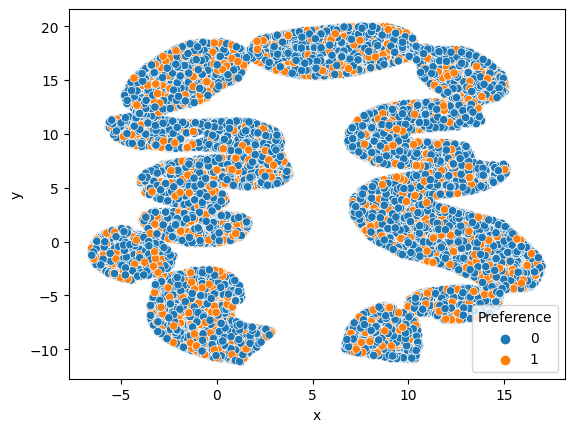

In [9]:
from seaborn import scatterplot

scatterplot(data=df, x='x', y='y', hue='Preference', )

This is a neat plot but there's no signal in the data.